# Penalized regression

Another way to select some features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet

In [2]:
fish = pd.read_csv("./data/fish.csv", usecols=np.arange(1,20,1))

#dependent variable
y = fish['health']

# explaining variables
names = fish.columns[1:len(fish.columns)]
X = fish[names]

# _train related to the training set, _test to the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Learning

Penalized regression adds a sum of coefficients (i.e. the weights we find in a linear regression) to the loss function.

With that penalty, we're trying to predict the values of the variable of interest with a minimal number of features (with respect to the parcimony principle-Occam razor).

Adding a l1 penalty -> LASSO regression (Least Absolute Shrinkage and Selection Operator)

Adding a l2 penalty -> Ridge regression

Adding a weighted sum of l1 and l2 penalty -> Elasticnet

In [3]:
enr = ElasticNet(l1_ratio = 1)
# l1_ratio = 1 -> Lasso
# l1_ratio = 0 -> ridge
# 0 < l1_ratio < 1 -> elasticnet
enr.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Let's take a look at the regression coefficients

In [4]:
enr.coef_

array([ 0.10767492,  0.12779911,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ])

Two features seems to be important, the first ones

In [5]:
selection = np.where(enr.coef_!=0)[0]
selection

array([0, 1])

We could sort the cofficients by their absolute values, if there are still too much coefficients

In [6]:
enr.predict(X_test)

array([2.94447449, 2.65640397, 1.93570478, 2.77015405, 3.09600126,
       2.02314649, 2.79544388, 2.40588705, 2.26881053, 3.15625117,
       1.76804777, 2.29620637, 2.40493953, 2.58299051, 2.59390673,
       1.82054605, 2.15489697, 2.75090485, 2.22793251, 2.5088841 ,
       2.77624516, 2.98619748, 2.30574148, 2.13122788, 2.16127429,
       3.27785179, 2.18806778, 2.47267403, 3.38999694, 2.51067561,
       1.64027854, 2.07949327, 2.27861796, 1.98341   , 2.28926791,
       2.61854895, 3.02413612, 2.62884601, 3.2551147 , 2.36304266,
       3.06736013, 2.2883037 , 2.05469097, 1.93181838, 2.72428533,
       2.12751009, 2.6389812 , 2.12992932, 1.72402461, 2.33816173,
       2.12760839, 2.58168708, 3.11990403, 2.56393209, 2.30131295,
       2.89020867, 2.88466628, 2.09091088, 2.91503203, 2.49239143,
       3.12605025, 2.1689198 , 2.50397558, 3.71318123, 2.19806026,
       3.05796668, 2.60723349, 1.68981676, 2.74957644, 2.55499797,
       3.00960642, 2.01061056, 2.99074627, 2.18545095, 1.69041

Mean Squared Error : 1.5742829047589761


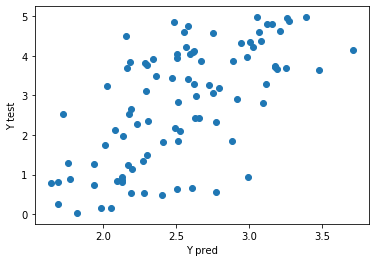

In [7]:
#our predictions
y_pred = enr.predict(X_test)

print("Mean Squared Error : "+str(np.mean((y_pred-y_test)**2)))

plt.scatter(y_pred, y_test)
plt.ylabel("Y test")
plt.xlabel("Y pred")
plt.show()